In [60]:
import pandas as pd 

bio_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_11_11_bio.csv", index_col=0)
clip_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_baseline.csv", index_col=0)
visual_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_visual_branch_only.csv", index_col=0)
bio_res.rename(columns={'acc': 'bio_accuracy'}, inplace=True)
clip_res.rename(columns={'acc': 'clip_accuracy'}, inplace=True)
visual_res.rename(columns={'acc': 'visonly_accuracy'}, inplace=True)
print(bio_res.head())
print(clip_res.head())
print(visual_res.head())
merged_df = pd.merge(bio_res, clip_res, on='global_step')
merged_df = pd.merge(visual_res, merged_df, on="global_step")
merged_df.set_index('global_step', inplace=True)
print(merged_df)

   global_step  bio_accuracy
0         1000      0.623830
1         2000      0.645696
2         3000      0.656694
3         4000      0.644517
4         5000      0.652570
   global_step  clip_accuracy
0         1000       0.557905
1         2000       0.491391
2         3000       0.547300
3         4000       0.581342
4         5000       0.581342
   global_step  visonly_accuracy
0         1000          0.641899
1         2000          0.658200
2         3000          0.671948
3         4000          0.662782
4         5000          0.657741
             visonly_accuracy  bio_accuracy  clip_accuracy
global_step                                               
1000                 0.641899      0.623830       0.557905
2000                 0.658200      0.645696       0.491391
3000                 0.671948      0.656694       0.547300
4000                 0.662782      0.644517       0.581342
5000                 0.657741      0.652570       0.581342
6000                 0.675548      

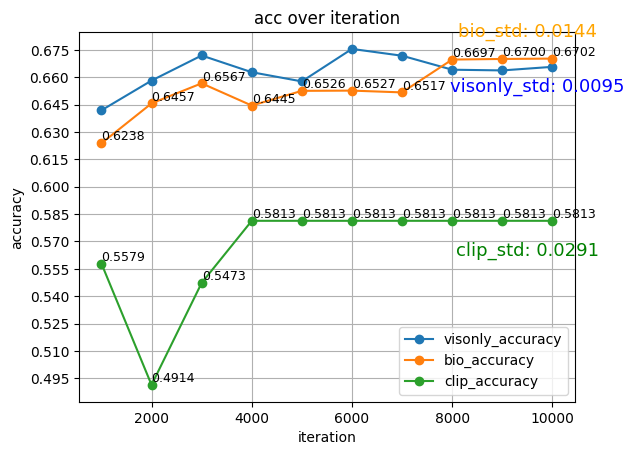

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

merged_df.plot(kind='line', marker='o')

bio_max = merged_df.bio_accuracy.max()
clip_max = merged_df.clip_accuracy.max()
bio_std = merged_df.bio_accuracy.std()
clip_std = merged_df.clip_accuracy.std()
vis_std = merged_df.visonly_accuracy.std()
# 设置图表标题和标签
plt.title('acc over iteration')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=15))
for i, txt in enumerate(merged_df['bio_accuracy']):
    plt.text(merged_df.index[i], txt, f'{txt:.4f}', ha='left', va='bottom', fontsize=9)
for i, txt in enumerate(merged_df['clip_accuracy']):
    plt.text(merged_df.index[i], txt, f'{txt:.4f}', ha='left', va='bottom', fontsize=9)
plt.text(9500, 0.69, f'bio_std: {bio_std:.4f}', fontsize=13, ha='center', va='top', color='orange')
plt.text(9500, 0.56, f'clip_std: {clip_std:.4f}', fontsize=13, ha='center', va='bottom', color='green')
plt.text(9700, 0.65, f'visonly_std: {vis_std:.4f}', fontsize=13, ha='center', va='bottom', color='blue')
# 显示图表
plt.grid()
plt.show()
